In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d0 = pd.read_csv('train.csv')

In [3]:
l = d0['label']
d = d0.drop('label', axis = 1)

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


/usr/local/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


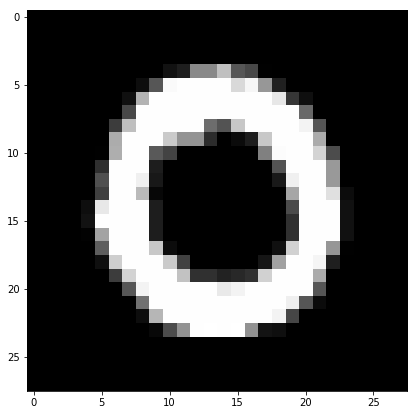

In [5]:
plt.figure(figsize=(7,7))
idx = 1
grid_data = d.iloc[1].as_matrix().reshape(28,28)
plt.imshow(grid_data, cmap = 'gray')
plt.show()

In [6]:
labels = l
data = d

In [7]:
data.shape

(42000, 784)

In [8]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(data)
standardised_data.shape

(42000, 784)

In [9]:
# Covariance matrix

sample_data = standardised_data
covar_matrix = np.matmul(sample_data.T, sample_data)
covar_matrix.shape

(784, 784)

In [10]:
# Eigen values and vectors

from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals = (782, 783))
vectors = vectors.T
vectors.shape

(2, 784)

In [11]:
new_coordinates = np.matmul(vectors, sample_data.T)

In [12]:
new_coordinates.shape

(2, 42000)

In [13]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


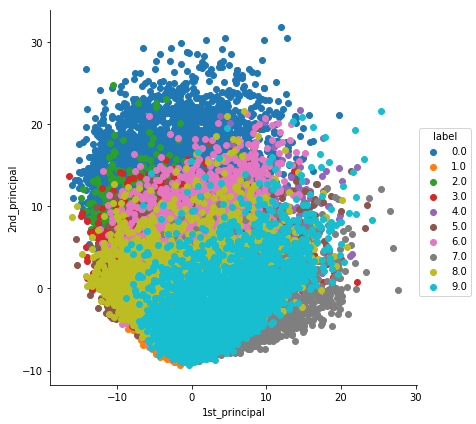

In [14]:
import seaborn as sn
sn.FacetGrid(dataframe, hue = 'label', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [15]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


In [16]:
# v1>v2>v3 - *direction* variance v1 retained more than v2,...
# Lambda l1>l2>l3 - percentage of information retained


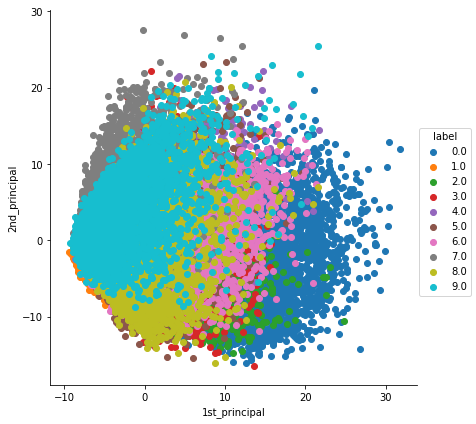

In [17]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

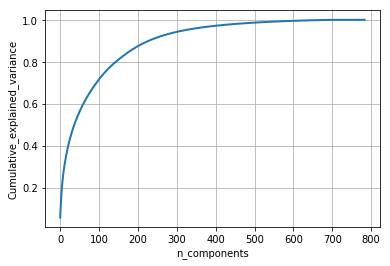

In [18]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.